<a href="https://colab.research.google.com/github/vaishnavi4445/Lung_cancer_classification/blob/main/Lung_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1

Missing Values:
Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

Unique values in 'Result' column:
[1 0]

Accuracy: 0.92

Confusion Matrix:
[[8 0]
 [1 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



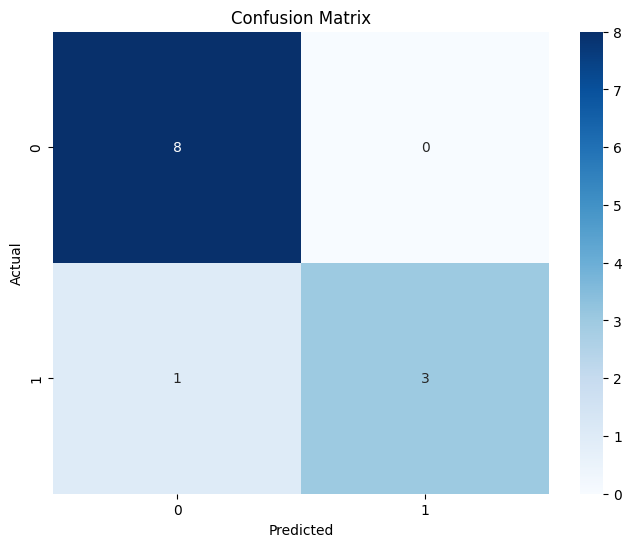

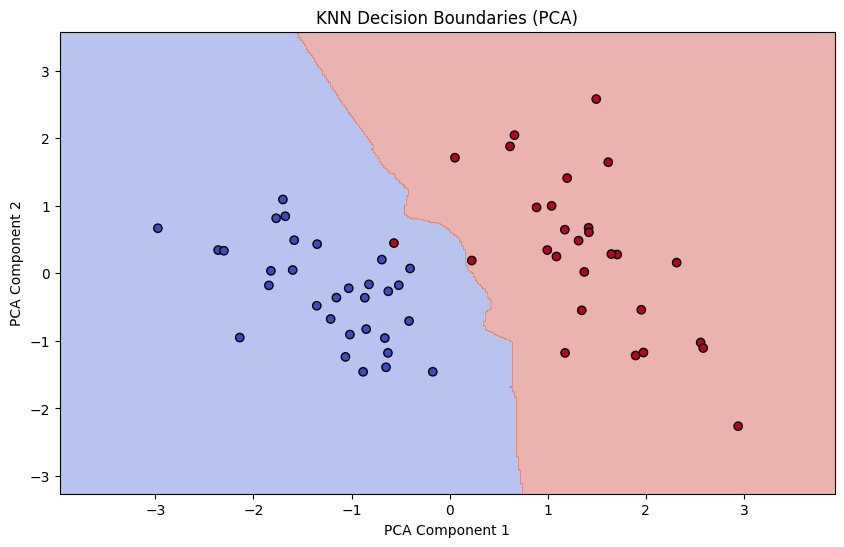

['scaler.pkl']

In [7]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import joblib

# 📥 Load dataset
df = pd.read_csv('/content/lung_cancer_examples.csv')  # Update path if needed
print("Dataset Preview:")
print(df.head())

# 🧹 Data Cleaning
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing values if any, excluding non-numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


# 🎯 Define features and target
X = df.drop(['Result', 'Name', 'Surname'], axis=1)  # Replace with actual target column name and exclude non-numeric columns
y = df['Result']

# Check unique values in the target column
print("\nUnique values in 'Result' column:")
print(y.unique())

# 🔄 Encode target if it's categorical - Removed as 'Result' is already numerical
# y = y.map({'YES': 1, 'NO': 0})  # Adjust based on your dataset

# 📏 Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🧠 Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 📈 Predictions and Evaluation
y_pred = knn.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 🔍 Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 🌈 PCA for Decision Boundary Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, y)

# 🧭 Decision Boundary Plot
def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

plot_decision_boundaries(X_pca, y, knn_pca, title='KNN Decision Boundaries (PCA)')

# 💾 Save model and scaler
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')